In [1]:
import os
import sys
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

In [2]:
feat = pd.read_csv('../engine/data-processed/features.csv')
meta = pd.read_csv('../engine/data-processed/meta.csv')

In [3]:
data = feat.merge(meta, on='cell_id')

In [4]:
[feat.shape, meta.shape, data.shape]

[(3839, 101), (4481, 12), (3839, 112)]

In [5]:
data.head()

,Unnamed: 0_x,cell_EquatorialEccentricity,cell_MeridionalEccentricity,cell_centroid_x,cell_centroid_x_norm,cell_centroid_y,cell_centroid_y_norm,cell_centroid_z,cell_centroid_z_norm,cell_first_axis_length,...,cell_ver,czi_filename,idx_in_stack,mitosis,mode,roi,src_csv,src_csv_row,str_ver,structure_name
0,0,0.954248,0.992144,410.196840,0.107601,200.282480,0.074716,99.909683,0.213683,267.127038,...,0.1.0,20161209_C01_002.czi,3,0,n,"[19, 195, 332, 513, 65, 295]",//allen/aics/assay-dev/StashSpreadsheets/assay...,7,0.1.0,FBL
1,1,0.919504,0.993980,358.856377,0.045385,337.198618,-0.002020,100.529134,0.091619,276.640338,...,0.1.0,20161209_C01_002.czi,4,0,n,"[19, 187, 264, 453, 226, 444]",//allen/aics/assay-dev/StashSpreadsheets/assay...,8,0.1.0,FBL
2,2,0.891845,0.942940,186.607216,0.122459,528.397690,0.013015,114.846968,0.097995,202.939604,...,0.1.0,20161209_C01_002.czi,5,0,n,"[19, 190, 73, 322, 422, 613]",//allen/aics/assay-dev/StashSpreadsheets/assay...,9,0.1.0,FBL
3,3,0.879992,0.989685,466.355636,-0.067556,262.586578,0.182389,133.596876,0.100411,330.426213,...,0.1.0,20161209_C01_002.czi,7,0,n,"[19, 195, 355, 594, 68, 397]",//allen/aics/assay-dev/StashSpreadsheets/assay...,11,0.1.0,FBL
4,4,0.953563,0.980214,185.472376,-0.041318,367.911661,-0.065170,83.981297,0.083976,307.129410,...,0.1.0,20161209_C01_003.czi,1,0,n,"[8, 189, 78, 297, 228, 481]",//allen/aics/assay-dev/StashSpreadsheets/assay...,15,0.1.0,FBL


In [6]:
base_path = '/allen/aics/assay-dev/Analysis/QCB_database/cell_info/'

In [7]:
cid = 0
data['cell_id'].iloc[[cid]].values[0]

'c17a53d0-7ff6-4106-ab53-d2be3240f168'

In [8]:
cell_name = data['cell_id'].values[cid]
img = io.imread(os.path.join(base_path,cell_name,'seg.ome.tif'))
img.shape

(5, 176, 181, 230)

In [9]:
img = np.max(img,axis=1)
img = np.swapaxes(img,0,2)
img = img[:,:,:3]
img.shape

(230, 181, 3)

In [10]:
def fixColor(img):
    for i in [2,0,1]:
        for j in [2,0,1]:
            if i != j:
                img[img[:,:,i]>0,j] = 0
    img[np.all(img==0,axis=2),:] = 255
    return img
img = fixColor(img)

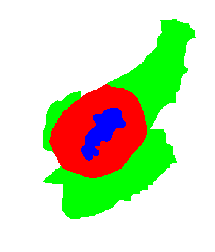

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
plt.axis('off')
ax.imshow(img)

In [12]:
[img.max(), img.dtype]

[255, dtype('uint8')]

In [13]:
io.imsave(os.path.join('../engine/app/static/imgs',cell_name+'.jpg'),img)
os.path.join('../engine/app/static/imgs',cell_name+'.jpg')

'../engine/app/static/imgs/c17a53d0-7ff6-4106-ab53-d2be3240f168.jpg'

In [18]:
def getImage(cell_name):
    img = io.imread(os.path.join(base_path,cell_name,'seg.ome.tif'))
    img = np.max(img,axis=1)
    img = np.swapaxes(img,0,2)
    img = img[:,:,:3]
    img = fixColor(img)
    return img

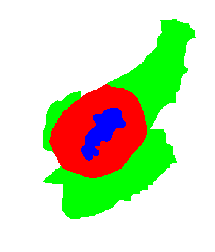

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
plt.axis('off')
ax.imshow(getImage(cell_name))

In [25]:
from ipywidgets import FloatProgress
bar = FloatProgress(min=0, max=data.shape[0])
display(bar)

FloatProgress(value=0.0, max=3839.0)

In [ ]:
for idx, cid in enumerate(data['cell_id'].values):
    img = getImage(cid)
    io.imsave(os.path.join('../engine/app/static/imgs',cid+'.jpg'),img)
    bar.value = idx